In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

In [2]:
from google.colab import files
uploaded=files.upload()

Saving claimants.csv to claimants.csv


In [3]:
#Load the data set
claimants = pd.read_csv("claimants.csv")
claimants.head()

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
2,66,1,0.0,1.0,0.0,5.0,0.330
3,70,0,0.0,1.0,1.0,31.0,0.037
4,96,1,0.0,1.0,0.0,30.0,0.038


In [4]:
claimants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CASENUM   1340 non-null   int64  
 1   ATTORNEY  1340 non-null   int64  
 2   CLMSEX    1328 non-null   float64
 3   CLMINSUR  1299 non-null   float64
 4   SEATBELT  1292 non-null   float64
 5   CLMAGE    1151 non-null   float64
 6   LOSS      1340 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 73.4 KB


In [5]:
# Drop the "Case number" column as it is not required
claimants.drop(["CASENUM"],inplace=True,axis = 1)

In [6]:
claimants

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0,0.0,1.0,0.0,50.0,34.940
1,1,1.0,0.0,0.0,18.0,0.891
2,1,0.0,1.0,0.0,5.0,0.330
3,0,0.0,1.0,1.0,31.0,0.037
4,1,0.0,1.0,0.0,30.0,0.038
...,...,...,...,...,...,...
1335,1,0.0,1.0,0.0,NaN,0.576
1336,0,1.0,1.0,0.0,46.0,3.705
1337,1,1.0,1.0,0.0,39.0,0.099
1338,0,1.0,0.0,0.0,8.0,3.177


In [ ]:
#Without using the 'inplace=True', we will have to create a copy of the dataset while dropping the mentioned column
#claimants1=claimants.drop(["CASENUM"],axis = 1)
#claimants1

In [7]:
#To check number of missing values?
claimants.isnull().sum()

ATTORNEY      0
CLMSEX       12
CLMINSUR     41
SEATBELT     48
CLMAGE      189
LOSS          0
dtype: int64

In [8]:
print('Percentage of data missing in the Age variable: ',(claimants['CLMAGE'].isnull().sum()/len(claimants))*100)
print('Percentage of data missing in the Gender variable: ', (claimants['CLMSEX'].isnull().sum()/len(claimants))*100)
print('Percentage of data missing in the SeatBelt variable: ',(claimants['SEATBELT'].isnull().sum()/len(claimants))*100)
print('Percentage of data missing in the Driver Insurance variable: ',(claimants['CLMINSUR'].isnull().sum()/len(claimants))*100)

Percentage of data missing in the Age variable:  14.1044776119403
Percentage of data missing in the Gender variable:  0.8955223880597015
Percentage of data missing in the SeatBelt variable:  3.582089552238806
Percentage of data missing in the Driver Insurance variable:  3.0597014925373136


In [ ]:
print('Percentage of data missing in the Age variable: ',(189/1340)*100)
print('Percentage of data missing in the Gender variable: ', (12/1340)*100)
print('Percentage of data missing in the SeatBelt variable: ',(48/1340)*100)
print('Percentage of data missing in the Driver Insurance variable: ',(41/1340)*100)

In [9]:
percent_missing = claimants.isnull().sum() * 100 / len(claimants)
missing_value_df = pd.DataFrame({'Columns': claimants.columns,
                                 'Number of values missing':claimants.isnull().sum(),
                                 'Percent_Missing': percent_missing})
missing_value_df

,Columns,Number of values missing,Percent_Missing
ATTORNEY,ATTORNEY,0,0.000000
CLMSEX,CLMSEX,12,0.895522
CLMINSUR,CLMINSUR,41,3.059701
SEATBELT,SEATBELT,48,3.582090
CLMAGE,CLMAGE,189,14.104478
LOSS,LOSS,0,0.000000


In [ ]:
claimants[claimants.isnull().any(axis=1)]

In [ ]:
len(claimants[claimants.isnull().any(axis=1)])/1340

In [10]:
# Removing NA values in data set
claimants = claimants.dropna()
claimants.shape

(1096, 6)

In [11]:
claimants.head()

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0,0.0,1.0,0.0,50.0,34.940
1,1,1.0,0.0,0.0,18.0,0.891
2,1,0.0,1.0,0.0,5.0,0.330
3,0,0.0,1.0,1.0,31.0,0.037
4,1,0.0,1.0,0.0,30.0,0.038


In [12]:
# Dividing our data into input and output variables
X = claimants.iloc[:,1:]    #Object for Independent Variables
Y = claimants.iloc[:,0]     #Object for the Dependent Variable

In [13]:
#Logistic regression and fit the model
classifier = LogisticRegression()
classifier.fit(X,Y)

LogisticRegression()

In [ ]:
#0= Male   1=Female
#0= Appointing Attorney    1=Not appointing attorney
#0=Wearing SeatBelt   1= Not Wearing SeatBelt
#0=Driver was uninsured   1=Driver was insured

In [ ]:
classifier.coef_

In [14]:
Beta_Coefficients=pd.Series(classifier.coef_[0])
Beta_Coefficients

0    0.426879
1    0.570688
2   -0.594399
3    0.006539
4   -0.384248
dtype: float64

In [15]:
Coef_df= pd.DataFrame({'Variables': ['CLMSEX','CLMINSUR','SEATBELT','CLMAGE','LOSS'], 'Beta Coefficients': Beta_Coefficients})
Coef_df

,Variables,Beta Coefficients
0,CLMSEX,0.426879
1,CLMINSUR,0.570688
2,SEATBELT,-0.594399
3,CLMAGE,0.006539
4,LOSS,-0.384248


- Gender
0= Male   1=Female

- Attorney
0=Attorney, if appointing attorney,  1=Attorney, if not appointing attorney

- Seatbelt
0=Wearing SeatBelt   1=Not Wearing SeatBelt

- Driver Insurance
0=driver of the claimant’s vehicle was uninsured    1=driver of the claimant’s vehicle was not uninsured

With a unit INCREASE in the independent variable, the dependent variable will increase/decrease by the beta coefficient value.

Interpretation

- A Female has 0.42% greater chances of not appointing Attorney as compared to males
- A claimant whose driver was insured has 0.57 greater chances of not appointing Attorney, as compared  to a claimant whose driver was uninsured.
- A claimant not wearing a seatbelt has 0.59 lesser chances not appointing Attorney.
- With a unit increase in the age of the claimant, there is 0.006% more chances that Attorney would not be hired.
- With a unit increase in the loss, there is 0.38 times lesser chances not appointing the Attorney.

For binary independent variables:
As compared to binary outcome '0' in the independent variable, the binary outcome '1' for the independent variable has beta coefficient times more/less (depending +/- sign) impact on the binary outcome '1' in the dependent variable.

For continuous independent variables:
Generally, With every unit increase in the independent variable outcome, there will be beta coefficient times more/less (depending +/- sign) impact on the binary outcome '1' in the dependent variable.

In [ ]:
classifier.intercept_

In [ ]:
classifier.classes_

In [16]:
import numpy as np
np.set_printoptions(suppress=True)
pred_prob=classifier.predict_proba(X)
pred_prob

array([[0.99999695, 0.00000305],
       [0.49285112, 0.50714888],
       [0.42483316, 0.57516684],
       ...,
       [0.26097133, 0.73902867],
       [0.71405941, 0.28594059],
       [0.31956879, 0.68043121]])

In [17]:
pred_prob=pd.DataFrame(pred_prob)
#pred_prob['y_pred'] = classifier.predict(X)[0:20]
pred_prob
pred_prob['y_pred_manual']=pred_prob[1].apply(lambda x: 0 if x<0.5 else 1)
pred_prob

,0,1,y_pred_manual
0,0.999997,0.000003,0
1,0.492851,0.507149,1
2,0.424833,0.575167,1
3,0.502210,0.497790,0
4,0.359246,0.640754,1
...,...,...,...
1091,0.287918,0.712082,1
1092,0.574174,0.425826,0
1093,0.260971,0.739029,1
1094,0.714059,0.285941,0


0 = Appointing Attorney
1 = Not Appointing Attorney

So the probabilities on the left side in the array, are in favour of outcome '0', and the probabilities on the right are in favour of outcome '1'

So if we refer to the probabilities on the right (outcome '1'),
for observations where this probability is greater than 0.5, the model will categorize that observation with label 1, and for observations where the right hand side probabilities is lesser than 0.5, model will label them as outcome '0'

In [18]:
#Predictions for X dataset
y_pred = classifier.predict(X)

In [ ]:
y_pred

array([0, 1, 1, ..., 1, 0, 1])

In [19]:
pred_prob['Predictions_Model'] = classifier.predict(X)
pred_prob

,0,1,y_pred_manual,Predictions_Model
0,0.999997,0.000003,0,0
1,0.492851,0.507149,1,1
2,0.424833,0.575167,1,1
3,0.502210,0.497790,0,0
4,0.359246,0.640754,1,1
...,...,...,...,...
1091,0.287918,0.712082,1,1
1092,0.574174,0.425826,0,0
1093,0.260971,0.739029,1,1
1094,0.714059,0.285941,0,0


In [20]:
y_pred_df= pd.DataFrame({'actual': Y,
                         'predictions': classifier.predict(X)})
#y_pred_df.reset_index(inplace = True)

In [21]:
#0 = Appointing Attorney 1 = Not Appointing Attorney
y_pred_df[0:30]

,actual,predictions
0,0,0
1,1,1
2,1,1
3,0,0
4,1,1
5,0,1
6,0,0
7,0,0
8,1,1
10,0,0


Actual = 0 & Prediction = 0
True Negatives (TN)

Actual = 1 & Prediction = 1
True Positives (TP)

Actual = 0 & Prediction = 1
False Positives (FP)

Actual = 1 & Prediction = 0
False Negative (FN)

In [22]:
TP=len(y_pred_df[(y_pred_df['actual']==1) & (y_pred_df['predictions']==1)])
TN=len(y_pred_df[(y_pred_df['actual']==0) & (y_pred_df['predictions']==0)])
FP=len(y_pred_df[(y_pred_df['actual']==0) & (y_pred_df['predictions']==1)])
FN=len(y_pred_df[(y_pred_df['actual']==1) & (y_pred_df['predictions']==0)])

In [23]:
print('True Positives', TP)
print('True Negatives', TN)
print('False Positives', FP)
print('False Negatives', FN)

True Positives 395
True Negatives 381
False Positives 197
False Negatives 123


In [ ]:
y_pred_df

In [24]:
y_pred_df.reset_index(drop=True, inplace=True)
y_pred_df

,actual,predictions
0,0,0
1,1,1
2,1,1
3,0,0
4,1,1
...,...,...
1091,1,1
1092,0,0
1093,1,1
1094,0,0


In [25]:
Result=[]
for i in range(len(y_pred_df)):
    if (y_pred_df.loc[i,'actual']==1) & (y_pred_df.loc[i,'predictions']==1):
      Result.append('True Positive')
    elif (y_pred_df.loc[i,'actual']==0) & (y_pred_df.loc[i,'predictions']==0):
      Result.append('True Negative')
    elif (y_pred_df.loc[i,'actual']==1) & (y_pred_df.loc[i,'predictions']==0):
      Result.append('False Negative')
    elif (y_pred_df.loc[i,'actual']==0) & (y_pred_df.loc[i,'predictions']==1):
      Result.append('False Positive')
    else:
      Result.append('Invalid')

y_pred_df['Result']=pd.Series(Result)
y_pred_df[0:30]

#y_pred_df.drop('index',axis=1,inplace=True)
y_pred_df

,actual,predictions,Result
0,0,0,True Negative
1,1,1,True Positive
2,1,1,True Positive
3,0,0,True Negative
4,1,1,True Positive
...,...,...,...
1091,1,1,True Positive
1092,0,0,True Negative
1093,1,1,True Positive
1094,0,0,True Negative


In [ ]:
y_pred_df['Result'].value_counts()

In [26]:
'''With the code below, we are finding out the cases where the model predictions
match the actual values in the data, and cross-checking the accuracy of the model'''
print(len(y_pred_df[y_pred_df['actual']==y_pred_df['predictions']]))
print(len(y_pred_df))

len(y_pred_df[y_pred_df['actual']==y_pred_df['predictions']])/len(y_pred_df)

776
1096


0.708029197080292

In [27]:
print(len(y_pred_df[y_pred_df['actual'] != y_pred_df['predictions']]))
print(len(y_pred_df))

len(y_pred_df[y_pred_df['actual']!=y_pred_df['predictions']])/len(y_pred_df)

320
1096


0.291970802919708

In [28]:
classifier.score(X,Y)

0.708029197080292

In [ ]:
print('Accuracy',round(len(y_pred_df[y_pred_df['actual']==y_pred_df['predictions']])/len(y_pred_df),4))
print('Accuracy', round(classifier.score(X,Y),4))

In [29]:
# Confusion Matrix for the model accuracy
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y,y_pred)
print(cm)

#Left diagonal talks about correct predictions by model
#Right diagonal talks about incorrectly classified observations or errors.
#The lesser the values in the right diagonal, the better is your model.

#True Positive     395
#True Negative     381
#False Positive    197
#False Negative    123

[[381 197]
 [123 395]]


In [ ]:
#Checking for Accuracy in terms of percentage
((381+395)/(381+197+123+395))*100

- Sensitivity = TP/(TP+FN)
- Specificity = TN/(FP+TN)
- Prevalence = (TP+FN)/(TP+FP+FN+TN)
- PPV = (sensitivity * prevalence)/((sensitivity*prevalence) + ((1-specificity)*(1-prevalence)))
- NPV = (specificity * (1-prevalence))/(((1-sensitivity)*prevalence) + ((specificity)*(1-prevalence)))
- Detection Rate = TP/(TP+FP+FN+TN)
- Detection Prevalence = (TP+FP)/(TP+FP+FN+TN)
- Balanced Accuracy = (sensitivity+specificity)/2
- Precision (Positive Predicted Value) = TP/(TP+FP)
- Recall = TP/(TP+FN)
- Negative Predicted Value = TN/(FN+TN)
- Miss Rate(False Negative Rate) = FN/(TP+FN)
- Fall Out (False Positive Rate) = FP/(FP+TN)
- False Discovery Rate = FP/(TP+FP)
- False Omission Rate = FN/(FN+TN)


In [30]:
y_pred_df

,actual,predictions,Result
0,0,0,True Negative
1,1,1,True Positive
2,1,1,True Positive
3,0,0,True Negative
4,1,1,True Positive
...,...,...,...
1091,1,1,True Positive
1092,0,0,True Negative
1093,1,1,True Positive
1094,0,0,True Negative


In [31]:
#Checking for Sensitivity/Recall
Sensitivity=(TP/(TP+FN))
((395)/(395+123))*100
print('Sensitivity',round(Sensitivity,2))

Sensitivity 0.76


In [33]:
Sensitivity= len(y_pred_df[(y_pred_df['actual']==1) & (y_pred_df['predictions']==1)]) / len(y_pred_df[y_pred_df['actual']==1])
Sensitivity

0.7625482625482626

In [35]:
len(y_pred_df[y_pred_df['actual']==1])

518

In [37]:
#True Positives
len(y_pred_df[(y_pred_df['actual']==1) & (y_pred_df['predictions']==1)])

395

In [39]:
#False Negatives
len(y_pred_df[(y_pred_df['actual']==1) & (y_pred_df['predictions']==0)])

123

In [40]:
#Checking for Specificity
Specificity=(TN/(TN+FP))
((381)/(381+197))*100
print('Specificity',round(Specificity,2))

Specificity 0.66


In [42]:
Specificity=len(y_pred_df[(y_pred_df['actual']==0) & (y_pred_df['predictions']==0)]) / len(y_pred_df[y_pred_df['actual']==0])
Specificity

0.6591695501730104

In [43]:
#True Negatives
len(y_pred_df[(y_pred_df['actual']==0) & (y_pred_df['predictions']==0)])

381

In [44]:
##False Positives
len(y_pred_df[(y_pred_df['actual']==0) & (y_pred_df['predictions']==1)])

197

In [45]:
#Actual Zeros
len(y_pred_df[y_pred_df['actual']==0])

578

In [46]:
#Checking for Precision
Precision=(TP/(TP+FP))
((395)/(395+197))*100
print('Precision',round(Precision,2))

Precision 0.67


In [47]:
Precision=len(y_pred_df[(y_pred_df['actual']==1) & (y_pred_df['predictions']==1)])/len(y_pred_df[y_pred_df['predictions']==1])
Precision

0.6672297297297297

- Sensitivity is 0.76, which means out of total number of clients who did not appoint attorney (Label 1), in 76% cases the model could predict them correctly.

- Specificity is 0.66, which means out of total number of clients who actually appointed attorney (Label 0), in 66% cases the model could predict them correctly.

- Precision is 0.67, which means out of total number of clients where model says that they didn't appoint attorney, it was right in saying so in 67% of cases.

In [48]:
#Checking for F-Score
F_Score=(2*Precision*Sensitivity)/(Precision+Sensitivity)
print('F_Score',round(F_Score,2))

F_Score 0.71


In [49]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(Y,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.66      0.70       578
           1       0.67      0.76      0.71       518

    accuracy                           0.71      1096
   macro avg       0.71      0.71      0.71      1096
weighted avg       0.71      0.71      0.71      1096



In [50]:
pred_prob

,0,1,y_pred_manual,Predictions_Model
0,0.999997,0.000003,0,0
1,0.492851,0.507149,1,1
2,0.424833,0.575167,1,1
3,0.502210,0.497790,0,0
4,0.359246,0.640754,1,1
...,...,...,...,...
1091,0.287918,0.712082,1,1
1092,0.574174,0.425826,0,0
1093,0.260971,0.739029,1,1
1094,0.714059,0.285941,0,0


# ROC (Receiver Operating Curve)

0.7108589063606365


Text(0, 0.5, 'True Positive Rate / Sensitivity')

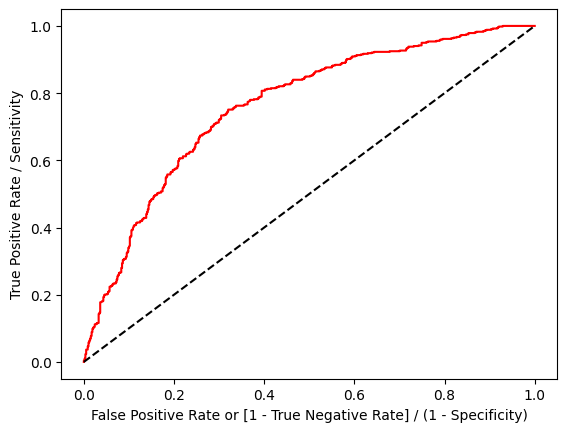

In [51]:
#AUC = Area Under Curve
#The greater the area under the curve, the better the model.
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(Y, classifier.predict_proba(X)[:,1])

auc = roc_auc_score(Y, y_pred)
print(auc)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate] / (1 - Specificity)')
plt.ylabel('True Positive Rate / Sensitivity')

In [ ]:
auc

In [ ]:
tpr

In [ ]:
fpr

In [ ]:
# importing libraries
import statsmodels.api as sm
import pandas as pd

# loading the training dataset
df = pd.read_csv("D:\\ALL DATA SCIENCE\\ExcelR\\Latest DS Material\\Day 15 Logistic Regression\\Dataset\\claimants.csv")

# defining the dependent and independent variables
# Dividing our data into input and output variables
X = claimants.iloc[:,1:]
Y = claimants.iloc[:,0]

# building the model and fitting the data
log_reg = sm.Logit(Y, X).fit()

In [ ]:
log_reg.summary()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [ ]:
dataset = pd.read_excel('D:\\ALL DATA SCIENCE\\ExcelR\\Datasets\\Logistic Regression.xlsx',sheet_name='Sheet1')
dataset
x = dataset.iloc[:,[2,3]].values
y = dataset.iloc[:, 4].values

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

In [ ]:
# Feature Scaling
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
# Fitting logistic regression to the training set
Classifier = LogisticRegression(random_state=0)
Classifier.fit(x_train, y_train)


# Predicting the test results
y_pred = Classifier.predict(x_test)
print("Accuracy score: ", accuracy_score(y_test, y_pred))


In [ ]:
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min()- 1 ,
                               stop = X_set[:, 0].max() + 1,step = 0.01),
                     np.arange(start - X_set[:, 1].min() -1,
                               stop = X_set[:, 0].max() + 1,step = 0.01)),
plt.contourf(X1, X2, classifier.predict(np. array([X1.ravel(), X2.ravel()].T).reshape(X1.shape),alpha = 0.75, Cmap = ListedColormap(('red', 'green')))
#plt.xlim(X1.min(), X1.max())
#plt.ylim(X1.min(), X1.max())
for i,j in enumerate(np.unique(y_set)):
             plt.scatter(X_set[y_set== j, 0], X_set[y_set == j, 1],c =  ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()